In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# 1. Match and Team Performance Analysis

In [3]:
match_data = pd.read_csv("ipl_match_data.csv")
ball_data = pd.read_csv("ipl_ball_by_ball.csv")
head_to_head_data = pd.read_csv("head_to_head_data.csv")

match_df = pd.DataFrame(match_data)
ball_df = pd.DataFrame(ball_data)
head_to_head_df = pd.DataFrame(head_to_head_data)

match_df

,Match_ID,City,Date,Venue,Home/Host,Team_1,Team_2,Winner,Toss_Winner,Toss_Decision,Season,Match_Number,Player_of_Match,Umpires
0,335982,Bengaluru,2008-04-18,M Chinnaswamy Stadium,RCB,RCB,KKR,KKR,RCB,field,2008,1,BB McCullum,"Asad Rauf, RE Koertzen"
1,335983,Chandigarh,2008-04-19,Punjab Cricket Association Stadium,PK,PK,CSK,CSK,CSK,bat,2008,2,MEK Hussey,"MR Benson, SL Shastri"
2,335984,Delhi,2008-04-19,Feroz Shah Kotla,DC,DC,RR,DC,RR,bat,2008,3,MF Maharoof,"Aleem Dar, GA Pratapkumar"
3,335985,Mumbai,2008-04-20,Wankhede Stadium,MI,MI,RCB,RCB,MI,bat,2008,5,MV Boucher,"SJ Davis, DJ Harper"
4,335986,Kolkata,2008-04-20,Eden Gardens,KKR,KKR,DCG,KKR,DCG,bat,2008,4,DJ Hussey,"BF Bowden, K Hariharan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1426307,Hyderabad,2024-05-19,Rajiv Gandhi International Stadium,SRH,PK,SRH,SRH,PK,bat,2024,69,Abhishek Sharma,"Nitin Menon, VK Sharma"
1092,1426309,Ahmedabad,2024-05-21,Narendra Modi Stadium,GT,SRH,KKR,KKR,SRH,bat,2024,70,MA Starc,"AK Chaudhary, R Pandit"
1093,1426310,Ahmedabad,2024-05-22,Narendra Modi Stadium,GT,RCB,RR,RR,RR,field,2024,71,R Ashwin,"KN Ananthapadmanabhan, MV Saidharshan Kumar"
1094,1426311,Chennai,2024-05-24,MA Chidambaram Stadium,CSK,SRH,RR,SRH,RR,field,2024,72,Shahbaz Ahmed,"Nitin Menon, VK Sharma"


In [1]:
# 1. Match and Team Performance Analysis

In [22]:
# Win/ Loss Ratio of each team across Season

team_1_wins = match_df[(match_df["Winner"] == match_df["Team_1"])].groupby(["Team_1", "Team_2"]).size().reset_index(name="Team_1win")
team_2_wins = match_df[match_df["Winner"] == match_df["Team_2"]].groupby(["Team_1", "Team_2"]).size().reset_index(name="Team_2win")

# Merging both win counts
win_loss_ratio = pd.merge(team_1_wins, team_2_wins, on=["Team_1", "Team_2"], how="outer").fillna(0)

# Reordering columns
win_loss_ratio = win_loss_ratio[["Team_1", "Team_2", "Team_1win", "Team_2win"]]
win_loss_ratio.columns = ["Home_Team", "Away_Team", "Team_1win", "Team_2win"]

win_loss_ratio = win_loss_ratio.groupby(["Home_Team", "Away_Team"]).agg(
    Team_1_Win = ("Team_1win","sum"),
    Team_2_Win = ("Team_2win" , "sum")
).reset_index()

win_loss_ratio["Team_1_Win"] = win_loss_ratio["Team_1_Win"].astype(int)
win_loss_ratio["Team_2_Win"] = win_loss_ratio["Team_2_Win"].astype(int)

# Calculating Win/Loss Ratio
win_loss_ratio["Win/Loss_ratio"] = (win_loss_ratio["Team_1_Win"] / win_loss_ratio["Team_2_Win"].replace(0, 1)).round(2)

print("Win/Loss Ratio of each Team across Season:\n")
win_loss_ratio[win_loss_ratio["Home_Team"] == "CSK"]

Win/Loss Ratio of each Team across Season:



,Home_Team,Away_Team,Team_1_Win,Team_2_Win,Win/Loss_ratio
0,CSK,DC,11,6,1.83
1,CSK,DCG,4,3,1.33
2,CSK,GT,2,3,0.67
3,CSK,KKR,9,5,1.80
4,CSK,KTK,1,0,1.00
5,CSK,LSG,1,3,0.33
6,CSK,MI,10,12,0.83
7,CSK,PK,8,7,1.14
8,CSK,PW,2,1,2.00
9,CSK,RCB,10,2,5.00


In [5]:
#Calculating Win-Percentage of each team

win_count = match_df[match_df["Winner"] != "Draw/No Result"].groupby("Winner").size().reset_index(name="win_count")
win_count.columns = ["Teams","win_count"]

total_matches = pd.concat([match_df["Team_1"],match_df["Team_2"]]).value_counts().reset_index()
total_matches.columns = ["Teams" , "Matches"]

win_percentage = pd.merge(win_count , total_matches , on = "Teams" )

win_percentage["Win_Percentage"] = ((win_percentage["win_count"] / win_percentage["Matches"]) * 100).round(2)

print(f"Win Percentage of each team across the season \n")
win_percentage

Win Percentage of each team across the season 



,Teams,win_count,Matches,Win_Percentage
0,CSK,138,238,57.98
1,DC,112,253,44.27
2,DCG,29,75,38.67
3,GL,13,30,43.33
4,GT,28,45,62.22
5,KKR,130,252,51.59
6,KTK,6,14,42.86
7,LSG,24,44,54.55
8,MI,142,261,54.41
9,PK,109,246,44.31


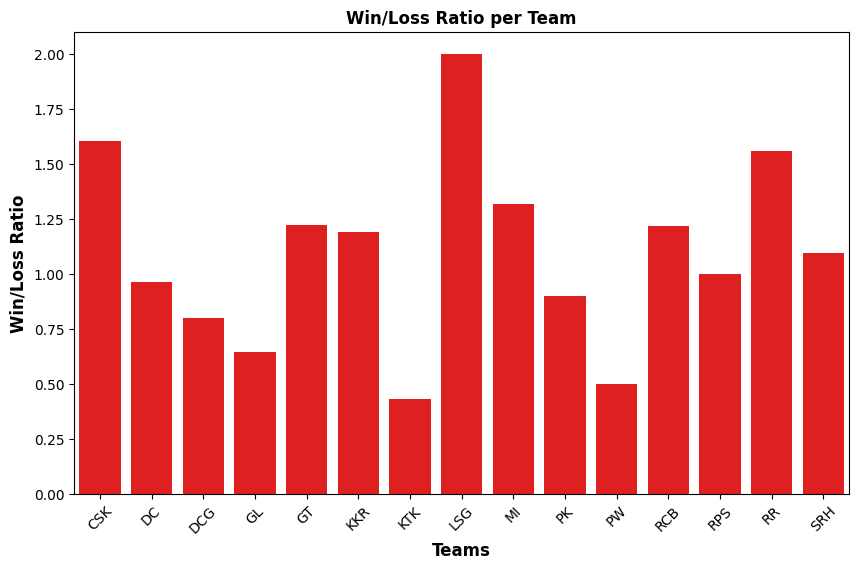

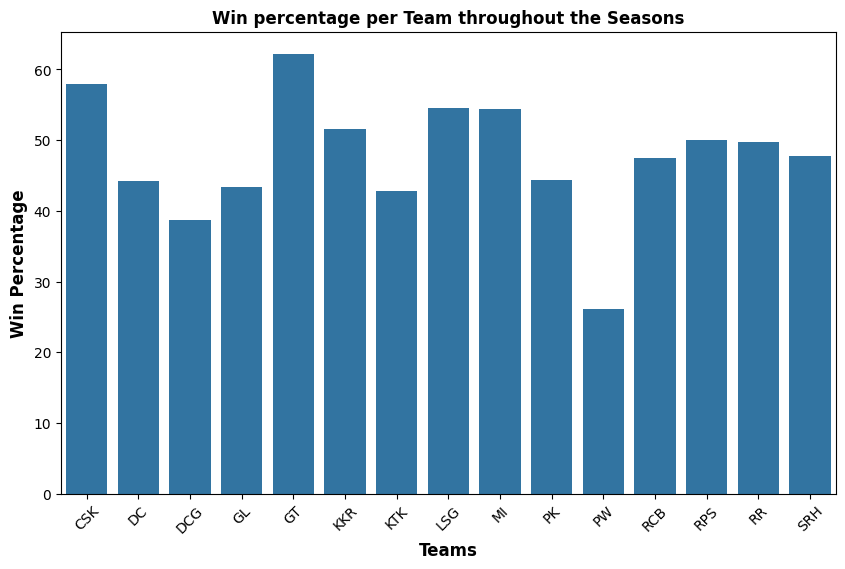

In [6]:
#Visualizing Win_loss Ratio and Win Percentage per Team

win_loss_ratio_plot = win_loss_ratio.groupby("Home_Team", as_index=False)["Win/Loss_ratio"].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x="Home_Team", y="Win/Loss_ratio", data=win_loss_ratio_plot , color = "red")
plt.title("Win/Loss Ratio per Team", fontsize=12, fontweight="bold")
plt.xlabel("Teams", fontsize=12, fontweight="bold")
plt.ylabel("Win/Loss Ratio", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="Teams" , y = "Win_Percentage",data = win_percentage)
plt.title("Win percentage per Team throughout the Seasons",fontsize=12, fontweight="bold")
plt.xlabel("Teams",fontsize=12, fontweight="bold")
plt.ylabel("Win Percentage",fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.show()


In [7]:
# 2. Player Statistics and Rankings

In [11]:
df = ball_df.copy()
df = df.fillna(0)

In [13]:
# Merge dataset
df = df.merge(match_df,on = ["Season" ,"Match_ID"] , how  = "left")

In [15]:
#Orange Cap Winners or Most runs scored by a batsman in each Season

run_df = df.copy()
run_df["Runs"] = run_df["Runs"] - run_df["Extras"]  

season_runs = run_df.groupby(["Season", "Batsman"])["Runs"].sum().reset_index()

orange_cap_holder = season_runs.loc[season_runs.groupby("Season")["Runs"].idxmax()].reset_index(drop=True)

print("Orange Cap winners of each Season:\n")
orange_cap_holder.head(17)


Orange Cap winners of each Season:



,Season,Batsman,Runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


In [16]:
#Purple Cap Winners or Most wickets taken by a bowler in each Season

wicket_df = df[~df["Wicket_Kind"].isin(["run out", "retired hurt", "obstructing the field", "retired out"])].copy()

wicket_df["Wickets"] = wicket_df["Wickets"].astype(int)

season_wickets = wicket_df.groupby(["Season", "Bowler"])["Wickets"].sum().reset_index()
purple_cap_holder = season_wickets.loc[season_wickets.groupby("Season")["Wickets"].idxmax()].reset_index(drop=True)

# Display the result
print("Purple Cap winners of each Season:\n")
purple_cap_holder.head(17)


Purple Cap winners of each Season:



,Season,Bowler,Wickets
0,2008,Sohail Tanvir,22
1,2009,RP Singh,23
2,2010,PP Ojha,21
3,2011,SL Malinga,28
4,2012,M Morkel,25
5,2013,DJ Bravo,32
6,2014,MM Sharma,23
7,2015,DJ Bravo,26
8,2016,B Kumar,23
9,2017,B Kumar,26


In [17]:
# Most Zeros or Ducks in each Season

df_ducks = df.groupby(["Season","Match_ID","Batsman"])["Runs"].sum().reset_index()
df_ducks = df_ducks[df_ducks["Runs"] == 0]

most_ducks = df_ducks.groupby(["Season","Batsman"]).size().reset_index(name="Ducks")
most_ducks = most_ducks.sort_values(by="Ducks",ascending=False)

most_ducks_season = most_ducks.loc[most_ducks.groupby("Season")["Ducks"].idxmax()].reset_index(drop=True)
print("Most Zeros or Ducks by a player each Season:\n")
most_ducks_season.head(17)

Most Zeros or Ducks by a player each Season:



,Season,Batsman,Ducks
0,2008,R Dravid,2
1,2009,PA Patel,3
2,2010,MK Tiwary,3
3,2011,M Manhas,4
4,2012,MK Pandey,4
5,2013,Gurkeerat Singh,3
6,2014,MG Johnson,2
7,2015,DR Smith,3
8,2016,R Ashwin,2
9,2017,C de Grandhomme,3


In [18]:
# Most Sixes hit by a Batsman in each Season

sixes_season = run_df[run_df["Runs"] == 6].groupby(["Season","Batsman"]).size().reset_index(name="Sixes")
sixes_season = sixes_season.sort_values(by=["Season","Sixes"],ascending=[True,False])

most_sixes = sixes_season.loc[sixes_season.groupby("Season")["Sixes"].idxmax()].reset_index(drop=True)
print("Most Sixes hit by a Batsman in each Season:\n")
most_sixes.head(17)

Most Sixes hit by a Batsman in each Season:



,Season,Batsman,Sixes
0,2008,ST Jayasuriya,31
1,2009,AC Gilchrist,29
2,2010,RV Uthappa,27
3,2011,CH Gayle,44
4,2012,CH Gayle,59
5,2013,CH Gayle,52
6,2014,GJ Maxwell,36
7,2015,CH Gayle,38
8,2016,V Kohli,38
9,2017,DA Warner,26


In [19]:
# Batting Stats

batsman_runs = run_df.groupby("Batsman")["Runs"].sum().reset_index()
batsman_runs = batsman_runs.sort_values(by="Runs",ascending=False)

df["Valid_Balls"] = df["Extras"].apply(lambda x:0 if x > 0 else 1)
balls_faced = df.groupby("Batsman")["Valid_Balls"].count().reset_index()
balls_faced = balls_faced.rename(columns={"Valid_Balls":"Ball_Faced"})

batsman_stats = pd.merge(batsman_runs,balls_faced,on="Batsman")

batsman_stats['Strike_Rate'] = ((batsman_runs["Runs"] / balls_faced["Ball_Faced"]) * 100).round(2)

print("Top 10 Batsmen:\n")
batsman_stats.head(10)

Top 10 Batsmen:



,Batsman,Runs,Ball_Faced,Strike_Rate
0,V Kohli,8014,6236,142.86
1,S Dhawan,6769,5483,125.54
2,RG Sharma,6630,5183,57.14
3,DA Warner,6567,4849,70.67
4,SK Raina,5536,4177,125.00
5,MS Dhoni,5243,3947,80.00
6,AB de Villiers,5181,3487,108.77
7,CH Gayle,4997,3516,100.00
8,RV Uthappa,4954,3927,71.43
9,KD Karthik,4843,3687,127.62


In [20]:
batsman_scores = run_df.groupby(["Season", "Match_ID", "Batsman"])["Runs"].sum().reset_index()

batsman_scores["Fifty"] = batsman_scores["Runs"].apply(lambda x: 1 if 50 <= x < 100 else 0)
batsman_scores["Hundred"] = batsman_scores["Runs"].apply(lambda x: 1 if x >= 100 else 0)

milestones_season = batsman_scores.groupby(["Season", "Batsman"])[["Hundred", "Fifty"]].sum().reset_index()
milestones_season = milestones_season.sort_values(by=["Season", "Hundred", "Fifty"], ascending=[True, False, False])


top_milestone_scorers = milestones_season.groupby("Season").head(1)

print("Total Hundreds and Fifties throughout the Season:\n")
top_milestone_scorers.head(17).reset_index(drop=True)


Total Hundreds and Fifties throughout the Season:



,Season,Batsman,Hundred,Fifty
0,2008,SE Marsh,1,5
1,2009,AB de Villiers,1,3
2,2010,M Vijay,1,2
3,2011,CH Gayle,2,3
4,2012,CH Gayle,1,7
5,2013,CH Gayle,1,4
6,2014,LMP Simmons,1,3
7,2015,AB de Villiers,1,2
8,2016,V Kohli,4,7
9,2017,HM Amla,2,2


In [16]:
# Highest Individual Score by a batsman in each Season

highest_score = run_df.groupby(["Season", "Match_ID" , "Inning" , "Batsman"])["Runs"].sum().reset_index()
highest_score = highest_score.sort_values(by="Runs" , ascending = False)
highest_score = highest_score.drop(columns = ["Match_ID","Inning"])

highest_individual_score = highest_score.loc[highest_score.groupby("Season")["Runs"].idxmax()].reset_index(drop=True)
highest_individual_score

,Season,Batsman,Runs
0,2008,BB McCullum,158
1,2009,MK Pandey,114
2,2010,M Vijay,127
3,2011,PC Valthaty,120
4,2012,CH Gayle,128
5,2013,CH Gayle,175
6,2014,V Sehwag,122
7,2015,AB de Villiers,133
8,2016,AB de Villiers,129
9,2017,DA Warner,126


In [17]:
# Bowling Stats

bowler_wickets = wicket_df.groupby("Bowler")["Wickets"].sum().reset_index()
bowler_wickets = bowler_wickets.sort_values(by="Wickets",ascending=False)

runs_conceded = df.groupby("Bowler")["Runs"].sum().reset_index()

bowler_stats = pd.merge(bowler_wickets,runs_conceded,on="Bowler")

bowler_stats["Bowling_Avg"] = (bowler_stats["Runs"] / bowler_stats["Wickets"]).round(0)

overs_bowled = df.groupby("Bowler")["Valid_Balls"].sum().reset_index()

overs_bowled["Overs_Bowled"] = (overs_bowled["Valid_Balls"] / 6).round(0)
overs_bowled.drop(columns="Valid_Balls")

bowler_stats = pd.merge(bowler_stats,overs_bowled,on="Bowler")

bowler_stats["Economy_Rate"] = (bowler_stats["Runs"] / bowler_stats["Overs_Bowled"]).round(2)

print("Top 10 Bowlers:\n")
bowler_stats.head(10)

Top 10 Bowlers:



,Bowler,Wickets,Runs,Bowling_Avg,Valid_Balls,Overs_Bowled,Economy_Rate
0,YS Chahal,205,4681,23.0,3469,578.0,8.10
1,PP Chawla,192,5179,27.0,3817,636.0,8.14
2,DJ Bravo,183,4436,24.0,3064,511.0,8.68
3,B Kumar,181,5051,28.0,3813,636.0,7.94
4,SP Narine,180,4672,26.0,4019,670.0,6.97
5,R Ashwin,180,5435,30.0,4470,745.0,7.30
6,A Mishra,174,4193,24.0,3336,556.0,7.54
7,SL Malinga,170,3486,21.0,2754,459.0,7.59
8,JJ Bumrah,168,3840,23.0,3003,500.0,7.68
9,RA Jadeja,160,4917,31.0,3784,631.0,7.79


In [21]:
# Most three-wickets haul taken by a Bowler

three_wickets = wicket_df.groupby(["Match_ID" , "Bowler"])["Wickets"].sum().reset_index()
three_wickets = three_wickets[three_wickets["Wickets"] >= 3]

three_wicket_counts  = three_wickets["Bowler"].value_counts().reset_index()
print("Most three or more wickets taken by a bowler in IPL:")
three_wicket_counts.sort_values(by = "count" ,ascending = False).head(10)

Most three or more wickets taken by a bowler in IPL:


,Bowler,count
0,JJ Bumrah,24
1,YS Chahal,20
2,SL Malinga,19
3,RA Jadeja,17
4,A Mishra,17
5,UT Yadav,16
6,Rashid Khan,16
7,MM Sharma,16
8,DJ Bravo,16
9,B Kumar,15


In [19]:
# Best Bowling figures in each Season

bowling_figures = wicket_df.groupby(["Season", "Match_ID", "Inning", "Bowler"]).agg(
    Wickets=("Wickets", "sum"),  
    Runs_Conceded=("Runs", "sum")  
).reset_index()

bowling_figures = bowling_figures.sort_values(by=["Wickets","Runs_Conceded"] , ascending = [False , True])
best_bowling_figures = bowling_figures.groupby("Season").first().reset_index()

best_bowling_figures = best_bowling_figures.drop(columns = ["Match_ID" , "Inning"])
print("Best Bowling figures in each Season:\n")
best_bowling_figures

Best Bowling figures in each Season:



,Season,Bowler,Wickets,Runs_Conceded
0,2008,Sohail Tanvir,6,15
1,2009,A Kumble,5,6
2,2010,DE Bollinger,4,14
3,2011,SL Malinga,5,13
4,2012,RA Jadeja,5,16
5,2013,JP Faulkner,5,18
6,2014,RA Jadeja,4,12
7,2015,A Nehra,4,11
8,2016,A Zampa,6,19
9,2017,AJ Tye,5,18


In [20]:
#3. Venue and Toss Impact Study

In [24]:
venue_df = match_df.copy()
venue_df

,Match_ID,City,Date,Venue,Home/Host,Team_1,Team_2,Winner,Toss_Winner,Toss_Decision,Season,Match_Number,Player_of_Match,Umpires
0,335982,Bengaluru,2008-04-18,M Chinnaswamy Stadium,RCB,RCB,KKR,KKR,RCB,field,2008,1,BB McCullum,"Asad Rauf, RE Koertzen"
1,335983,Chandigarh,2008-04-19,Punjab Cricket Association Stadium,PK,PK,CSK,CSK,CSK,bat,2008,2,MEK Hussey,"MR Benson, SL Shastri"
2,335984,Delhi,2008-04-19,Feroz Shah Kotla,DC,DC,RR,DC,RR,bat,2008,3,MF Maharoof,"Aleem Dar, GA Pratapkumar"
3,335985,Mumbai,2008-04-20,Wankhede Stadium,MI,MI,RCB,RCB,MI,bat,2008,5,MV Boucher,"SJ Davis, DJ Harper"
4,335986,Kolkata,2008-04-20,Eden Gardens,KKR,KKR,DCG,KKR,DCG,bat,2008,4,DJ Hussey,"BF Bowden, K Hariharan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1426307,Hyderabad,2024-05-19,Rajiv Gandhi International Stadium,SRH,PK,SRH,SRH,PK,bat,2024,69,Abhishek Sharma,"Nitin Menon, VK Sharma"
1092,1426309,Ahmedabad,2024-05-21,Narendra Modi Stadium,GT,SRH,KKR,KKR,SRH,bat,2024,70,MA Starc,"AK Chaudhary, R Pandit"
1093,1426310,Ahmedabad,2024-05-22,Narendra Modi Stadium,GT,RCB,RR,RR,RR,field,2024,71,R Ashwin,"KN Ananthapadmanabhan, MV Saidharshan Kumar"
1094,1426311,Chennai,2024-05-24,MA Chidambaram Stadium,CSK,SRH,RR,SRH,RR,field,2024,72,Shahbaz Ahmed,"Nitin Menon, VK Sharma"


In [25]:
venue_df["Date"] = pd.to_datetime(venue_df["Date"])
venue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Match_ID         1096 non-null   int64         
 1   City             1096 non-null   object        
 2   Date             1096 non-null   datetime64[ns]
 3   Venue            1096 non-null   object        
 4   Home/Host        1096 non-null   object        
 5   Team_1           1096 non-null   object        
 6   Team_2           1096 non-null   object        
 7   Winner           1096 non-null   object        
 8   Toss_Winner      1096 non-null   object        
 9   Toss_Decision    1096 non-null   object        
 10  Season           1096 non-null   int64         
 11  Match_Number     1096 non-null   int64         
 12  Player_of_Match  1091 non-null   object        
 13  Umpires          1096 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1

In [26]:
#Home and Venue Impact

venue_toss_data = venue_df[(venue_df["Home/Host"] != "Overseas") & (venue_df["Winner"] != "Draw/No result")]
home_advantage = venue_toss_data[venue_toss_data["Winner"] == venue_toss_data["Home/Host"]].groupby("Winner")["Home/Host"].count().reset_index(name="Win_count")
home_advantage.columns = ["Teams", "Win_count"]

df_team_wins = venue_df[venue_df["Winner"] != "Draw/No Result"].groupby("Winner").size().reset_index(name="win_count")
df_team_wins.columns = ["Teams" , "total_win_count"]

home_advantage = pd.merge(home_advantage,df_team_wins,on = "Teams" , how="left")
home_advantage["Home_Win_percentage"] = ((home_advantage["Win_count"] / home_advantage["total_win_count"]) * 100).round(2)

print(f"Most Home Wins by Each Team excluding Overseas:\n ")
home_advantage.sort_values(by='Win_count', ascending=False).reset_index(drop=True)

Most Home Wins by Each Team excluding Overseas:
 


,Teams,Win_count,total_win_count,Home_Win_percentage
0,MI,64,142,45.07
1,CSK,59,138,42.75
2,KKR,52,130,40.00
3,RR,45,110,40.91
4,RCB,43,121,35.54
5,PK,40,109,36.70
6,DC,40,112,35.71
7,SRH,38,87,43.68
8,GT,9,28,32.14
9,DCG,8,29,27.59


In [27]:
#Toss Impact 


df_team_wins = venue_df[venue_df["Winner"] != "Draw/No Result"].groupby("Winner").size().reset_index(name="win_count")
df_team_wins.columns = ["Teams" , "win_count"]

df_toss_wins = venue_df.groupby("Toss_Winner").size().reset_index(name="toss_win_count")
df_toss_wins.columns = ['Teams','toss_win_count']

df_wins_and_toss_wins = venue_df[venue_df["Winner"] == venue_df["Toss_Winner"]].groupby("Winner").size().reset_index()
df_wins_and_toss_wins.columns = ['Teams','wins_by_toss_count']

toss_impact  = df_team_wins.merge(df_toss_wins,on="Teams",how="left").merge(df_wins_and_toss_wins,on="Teams",how="left")

toss_impact["Toss_Win_percentage"] = ((toss_impact["wins_by_toss_count"] / toss_impact["toss_win_count"]) * 100).round(2)

toss_impact = toss_impact.sort_values(by=["wins_by_toss_count","Toss_Win_percentage"],ascending=[False,False]).reset_index(drop=True)

print(f"\nToss Impact Study:\n")
toss_impact


Toss Impact Study:



,Teams,win_count,toss_win_count,wins_by_toss_count,Toss_Win_percentage
0,MI,142,143,77,53.85
1,CSK,138,122,75,61.48
2,KKR,130,122,68,55.74
3,RCB,121,121,60,49.59
4,RR,110,120,59,49.17
5,DC,112,130,59,45.38
6,PK,109,109,44,40.37
7,SRH,87,88,38,43.18
8,DCG,29,43,19,44.19
9,GT,28,22,14,63.64


In [28]:
# Analysis of Toss Impact

contingency_table = pd.crosstab(toss_impact["toss_win_count"], toss_impact["wins_by_toss_count"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi_Square_Test results:\nchi2: {chi2}\np-value: {p}\ndegree of freedom: {dof}")

if p < 0.05:
    print("Toss decisions have a significant impact on match outcomes")
else:
    print("Toss decisions do not have a significant impact on match outcomes")

Chi_Square_Test results:
chi2: 165.0
p-value: 0.2954199471988688
degree of freedom: 156
Toss decisions do not have a significant impact on match outcomes


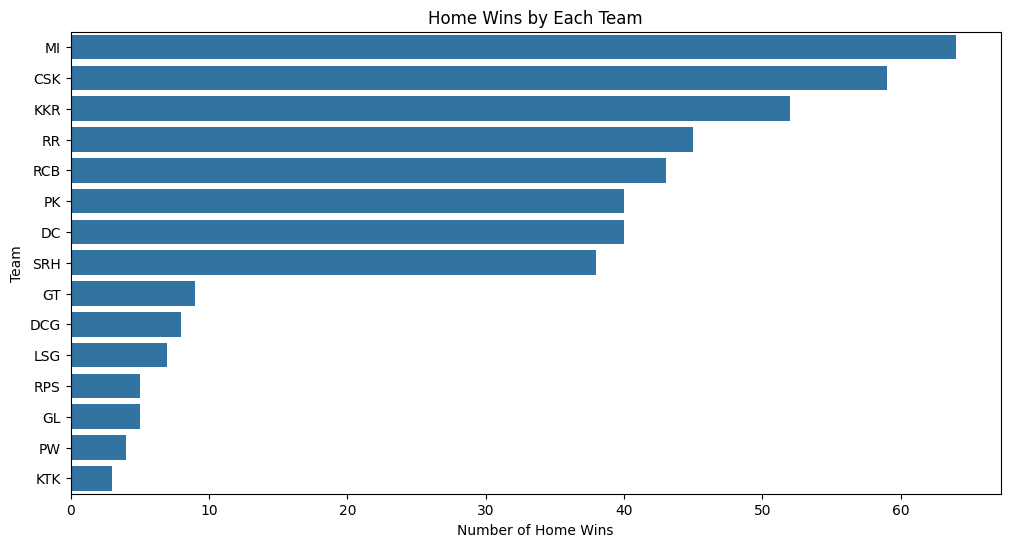

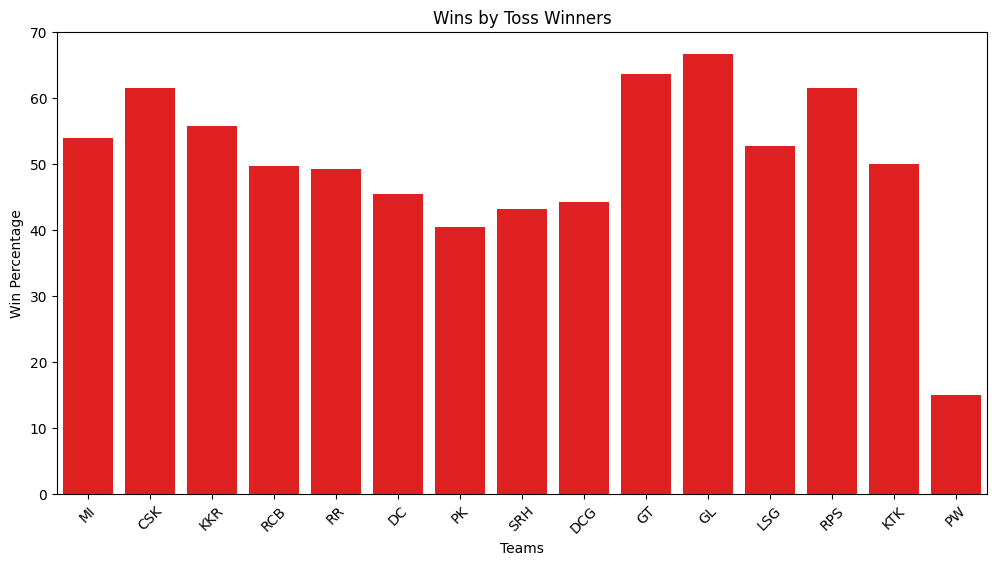

In [29]:
# Visualizing the Home Advantage and Toss Impact of each Team

plt.figure(figsize=(12, 6))
sns.barplot(x='Win_count', y='Teams', data=home_advantage.sort_values(by='Win_count', ascending=False))
plt.title('Home Wins by Each Team')
plt.xlabel('Number of Home Wins')
plt.ylabel('Team')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Teams', y='Toss_Win_percentage', data=toss_impact,color="red")
plt.title('Wins by Toss Winners')
plt.xlabel('Teams')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 4. Head to Head Comparison

In [30]:
hth_df = head_to_head_df.copy()
hth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team                83 non-null     object 
 1   Opponent            83 non-null     object 
 2   Total_Matches       83 non-null     int64  
 3   Team Wins           83 non-null     int64  
 4   Opponent Wins       83 non-null     int64  
 5   Team Win Ratio      83 non-null     float64
 6   Opponent Win Ratio  83 non-null     float64
 7   Team Runs           83 non-null     int64  
 8   Opponent Runs       83 non-null     int64  
 9   Team Wickets        83 non-null     int64  
 10  Opponent Wickets    83 non-null     int64  
 11  Team Sixes          83 non-null     int64  
 12  Opponent Sixes      83 non-null     int64  
 13  Team Home Wins      83 non-null     int64  
 14  Opponent Home Wins  83 non-null     int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 9.9+ KB


In [31]:
# Comparison of two team performances

team_1 = "CSK"
team_2 = "RCB"

df_team_comp = hth_df[((hth_df["Team"] == team_1) | (hth_df["Team"] == team_2)) & ((hth_df["Opponent"] == team_1) | (hth_df["Opponent"] == team_2))]
df_team_comp

,Team,Opponent,Total_Matches,Team Wins,Opponent Wins,Team Win Ratio,Opponent Win Ratio,Team Runs,Opponent Runs,Team Wickets,Opponent Wickets,Team Sixes,Opponent Sixes,Team Home Wins,Opponent Home Wins
9,RCB,CSK,32,11,21,0.34,0.66,4923,5122,181,218,198,234,5,10


In [32]:
hth_teams = match_df[
    ((match_df["Team_1"] == team_1) | (match_df["Team_1"] == team_2)) & 
    ((match_df["Team_2"] == team_1) | (match_df["Team_2"] == team_2))
]

hth_team_1_wins = hth_teams[hth_teams["Winner"] == team_1].groupby("Season")["Winner"].count().reset_index(name="Wins")
hth_team_2_wins = hth_teams[hth_teams["Winner"] == team_2].groupby("Season")["Winner"].count().reset_index(name="Wins")

hth_season_wins = pd.merge(hth_team_1_wins, hth_team_2_wins, on="Season", how="outer")


hth_season_wins.columns = ["Season", team_1, team_2]

hth_season_wins.fillna(0, inplace=True)


hth_season_wins[team_1] = hth_season_wins[team_1].astype(int)
hth_season_wins[team_2] = hth_season_wins[team_2].astype(int)


hth_season_wins = hth_season_wins.sort_values("Season")


print(f"Head-to-Head Wins Between {team_1} and {team_2}:\n")
hth_season_wins


Head-to-Head Wins Between CSK and RCB:



,Season,CSK,RCB
0,2008,1,1
1,2009,1,2
2,2010,1,1
3,2011,3,1
4,2012,1,0
5,2013,1,1
6,2014,1,1
7,2015,3,0
8,2018,2,0
9,2019,1,1


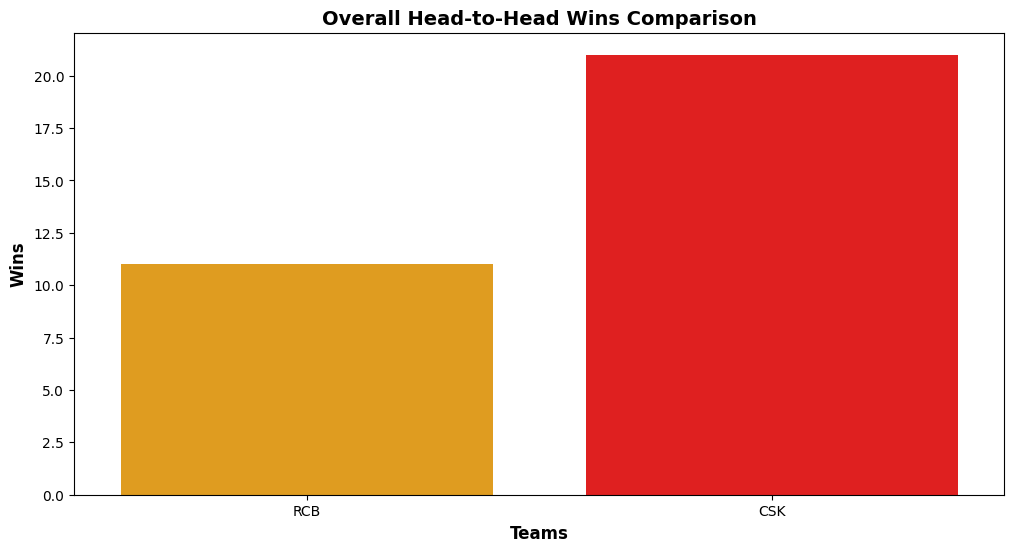

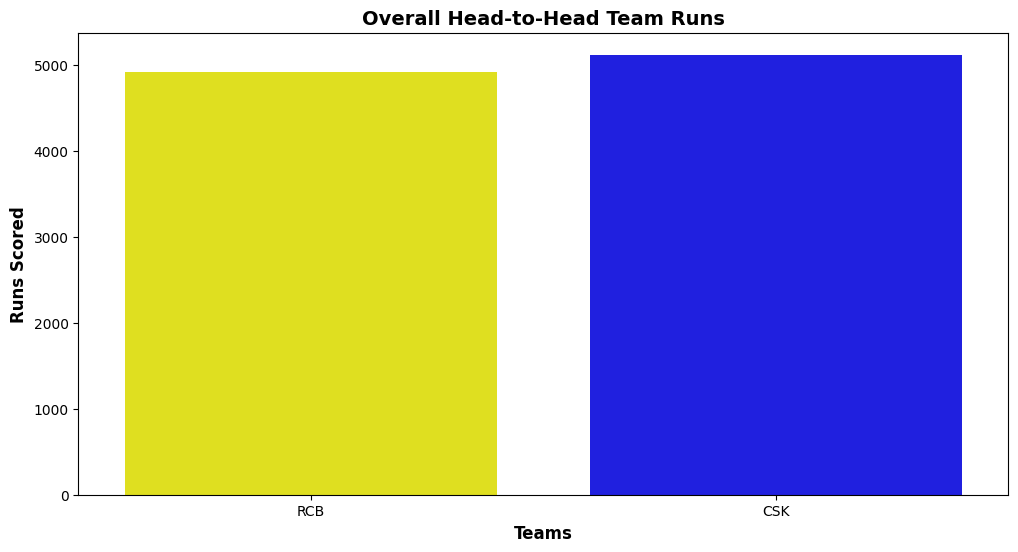

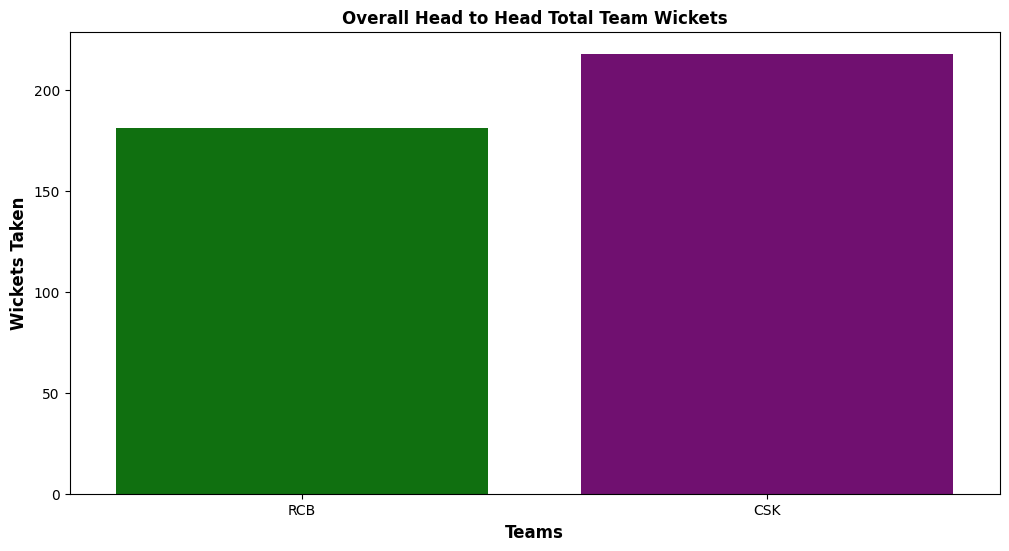

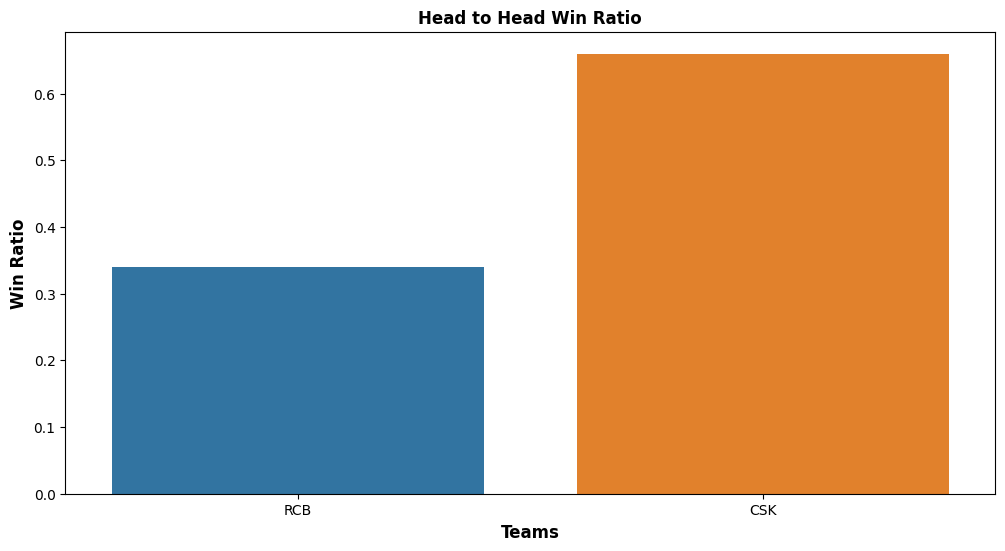

In [33]:
# Visualizing the Head to Head Team Performances

plt.figure(figsize=(12,6))
sns.barplot(x=df_team_comp["Team"] , y = df_team_comp["Team Wins"] , color = "Orange")
sns.barplot(x=df_team_comp["Opponent"] , y = df_team_comp["Opponent Wins"] , color = "Red")
plt.xlabel("Teams", fontsize=12, fontweight="bold")
plt.ylabel("Wins", fontsize=12, fontweight="bold")
plt.title("Overall Head-to-Head Wins Comparison", fontsize=14, fontweight="bold")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=df_team_comp["Team"] , y = df_team_comp["Team Runs"]  , color = "Yellow")
sns.barplot(x=df_team_comp["Opponent"] , y = df_team_comp["Opponent Runs"] ,  color = "Blue")
plt.xlabel("Teams", fontsize=12, fontweight="bold")
plt.ylabel("Runs Scored", fontsize=12, fontweight="bold")
plt.title("Overall Head-to-Head Team Runs", fontsize=14, fontweight="bold")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=df_team_comp["Team"] , y = df_team_comp["Team Wickets"] , color = "green")
sns.barplot(x=df_team_comp["Opponent"] , y = df_team_comp["Opponent Wickets"], color = "purple")
plt.xlabel("Teams",fontsize=12, fontweight="bold")
plt.ylabel("Wickets Taken",fontsize=12, fontweight="bold")
plt.title("Overall Head to Head Total Team Wickets",fontsize=12, fontweight="bold")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=df_team_comp["Team"] , y = df_team_comp["Team Win Ratio"])
sns.barplot(x=df_team_comp["Opponent"] , y = df_team_comp["Opponent Win Ratio"])
plt.xlabel("Teams",fontsize=12, fontweight="bold")
plt.ylabel("Win Ratio",fontsize=12, fontweight="bold")
plt.title("Head to Head Win Ratio",fontsize=12, fontweight="bold")
plt.show()


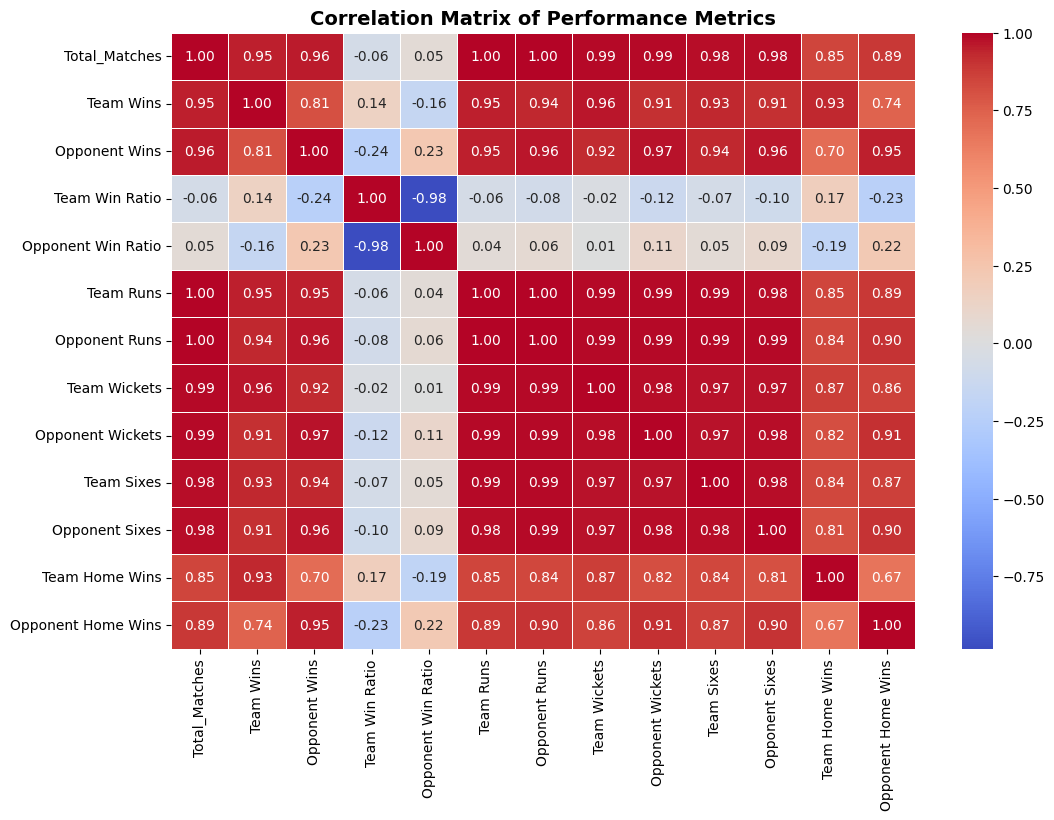

In [34]:
# Correlation Matrix Analysis

correlation_matrix = hth_df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar=True
)
plt.title("Correlation Matrix of Performance Metrics", fontsize=14, fontweight="bold")
plt.show()


In [ ]:
# 5. Win Prediction and Trend Analysis

In [35]:
team_matches = pd.melt(match_df, id_vars=['Season', 'Winner'], value_vars=['Team_1', 'Team_2'], var_name='Team_Type', value_name='Team')

# Group by Season and Team, count the matches
season_wise_team_matches = team_matches.groupby(["Season", "Team"]).size().reset_index(name="Match_Count")

# Calculate the number of wins for each team in each season
season_wins = match_df[match_df["Winner"] != "Draw/No Result"].groupby(["Season", "Winner"])['Winner'].size().reset_index(name="win_count")

# Calculate the number of losses for each team in each season
loss_matches = match_df[(match_df["Winner"] != "Draw/No Result")]

# Teams that lost are in 'Team_1' or 'Team_2' but not the winner
loss_matches = pd.melt(loss_matches, id_vars=['Season', 'Winner'], value_vars=['Team_1', 'Team_2'], var_name='Team_Type', value_name='Team')
season_losses = loss_matches[loss_matches["Team"] != loss_matches["Winner"]].groupby(["Season", "Team"]).size().reset_index(name="loss_count")

# Merging win and loss counts into the season_team_matches
season_wise_team_matches = season_wise_team_matches.merge(season_losses, left_on=["Season", "Team"], right_on=["Season", "Team"], how="left")
season_wise_team_matches = season_wise_team_matches.merge(season_wins, left_on=["Season", "Team"], right_on=["Season", "Winner"], how="left").drop(columns="Winner")

season_wise_team_matches

,Season,Team,Match_Count,loss_count,win_count
0,2008,CSK,16,7,9
1,2008,DC,15,7,7
2,2008,DCG,14,12,2
3,2008,KKR,14,7,6
4,2008,MI,14,7,7
...,...,...,...,...,...
141,2024,MI,14,10,4
142,2024,PK,14,9,5
143,2024,RCB,15,8,7
144,2024,RR,15,6,9


In [36]:
bat_team_wise_stats = df.groupby(["Season", "Batting_Team"]).agg(
    Runs=("Runs", "sum"),
    Balls_faced=("Ball", "count")  # Assuming 'Ball' column represents each delivery
).reset_index()
bat_team_wise_stats["Overs_Faced"] = bat_team_wise_stats["Balls_faced"] / 6
bat_team_wise_stats = bat_team_wise_stats.drop(columns="Balls_faced")
bat_team_wise_stats

,Season,Batting_Team,Runs,Overs_Faced
0,2008,CSK,2520,312.333333
1,2008,DC,2118,257.833333
2,2008,DCG,2229,278.000000
3,2008,KKR,1942,259.500000
4,2008,MI,2080,264.000000
...,...,...,...,...
141,2024,MI,2568,281.000000
142,2024,PK,2487,282.166667
143,2024,RCB,2930,303.000000
144,2024,RR,2647,305.333333


In [37]:
bowl_team_wise_stats = df[df["Extras"] == 0].groupby(["Season", "Bowling_Team"]).agg(
    Runs_conceded=("Runs", "sum"),
    Balls_bowled=("Ball", "count")  # Assuming 'Ball' column represents each delivery
).reset_index()

bowl_team_wise_stats["Overs_bowled"] = bowl_team_wise_stats["Balls_bowled"] / 6
bowl_team_wise_stats = bowl_team_wise_stats.drop(columns="Balls_bowled")
bowl_team_wise_stats

,Season,Bowling_Team,Runs_conceded,Overs_bowled
0,2008,CSK,2390,295.833333
1,2008,DC,2086,260.166667
2,2008,DCG,2156,257.000000
3,2008,KKR,1549,206.333333
4,2008,MI,1951,254.666667
...,...,...,...,...
141,2024,MI,2483,263.666667
142,2024,PK,2466,272.500000
143,2024,RCB,2663,280.333333
144,2024,RR,2514,293.500000


In [38]:
season_wise_team_matches = season_wise_team_matches.merge(bat_team_wise_stats, how="left", left_on=["Season", "Team"], right_on=["Season", "Batting_Team"])
season_wise_team_matches = season_wise_team_matches.merge(bowl_team_wise_stats, how="left", left_on=["Season", "Team"], right_on=["Season", "Bowling_Team"])
                                               

In [44]:
df_cleaned = season_wise_team_matches
df_cleaned = df_cleaned.drop(columns = "Bowling_Team")

In [51]:
df_cleaned = df_cleaned.drop(columns = "Batting_Team")

In [47]:
#Calculating Net Run Rate

df_cleaned["NRR"] = ((df_cleaned["Runs"]/df_cleaned["Overs_Faced"]) - (df_cleaned["Runs_conceded"]/df_cleaned["Overs_bowled"]))

In [52]:
df_cleaned

,Season,Team,Match_Count,loss_count,win_count,Runs,Overs_Faced,Runs_conceded,Overs_bowled,NRR
0,2008,CSK,16,7,9,2520,312.333333,2390,295.833333,-0.010570
1,2008,DC,15,7,7,2118,257.833333,2086,260.166667,0.196672
2,2008,DCG,14,12,2,2229,278.000000,2156,257.000000,-0.371119
3,2008,KKR,14,7,6,1942,259.500000,1549,206.333333,-0.023647
4,2008,MI,14,7,7,2080,264.000000,1951,254.666667,0.217793
...,...,...,...,...,...,...,...,...,...,...
141,2024,MI,14,10,4,2568,281.000000,2483,263.666667,-0.278403
142,2024,PK,14,9,5,2487,282.166667,2466,272.500000,-0.235602
143,2024,RCB,15,8,7,2930,303.000000,2663,280.333333,0.170562
144,2024,RR,15,6,9,2647,305.333333,2514,293.500000,0.103626


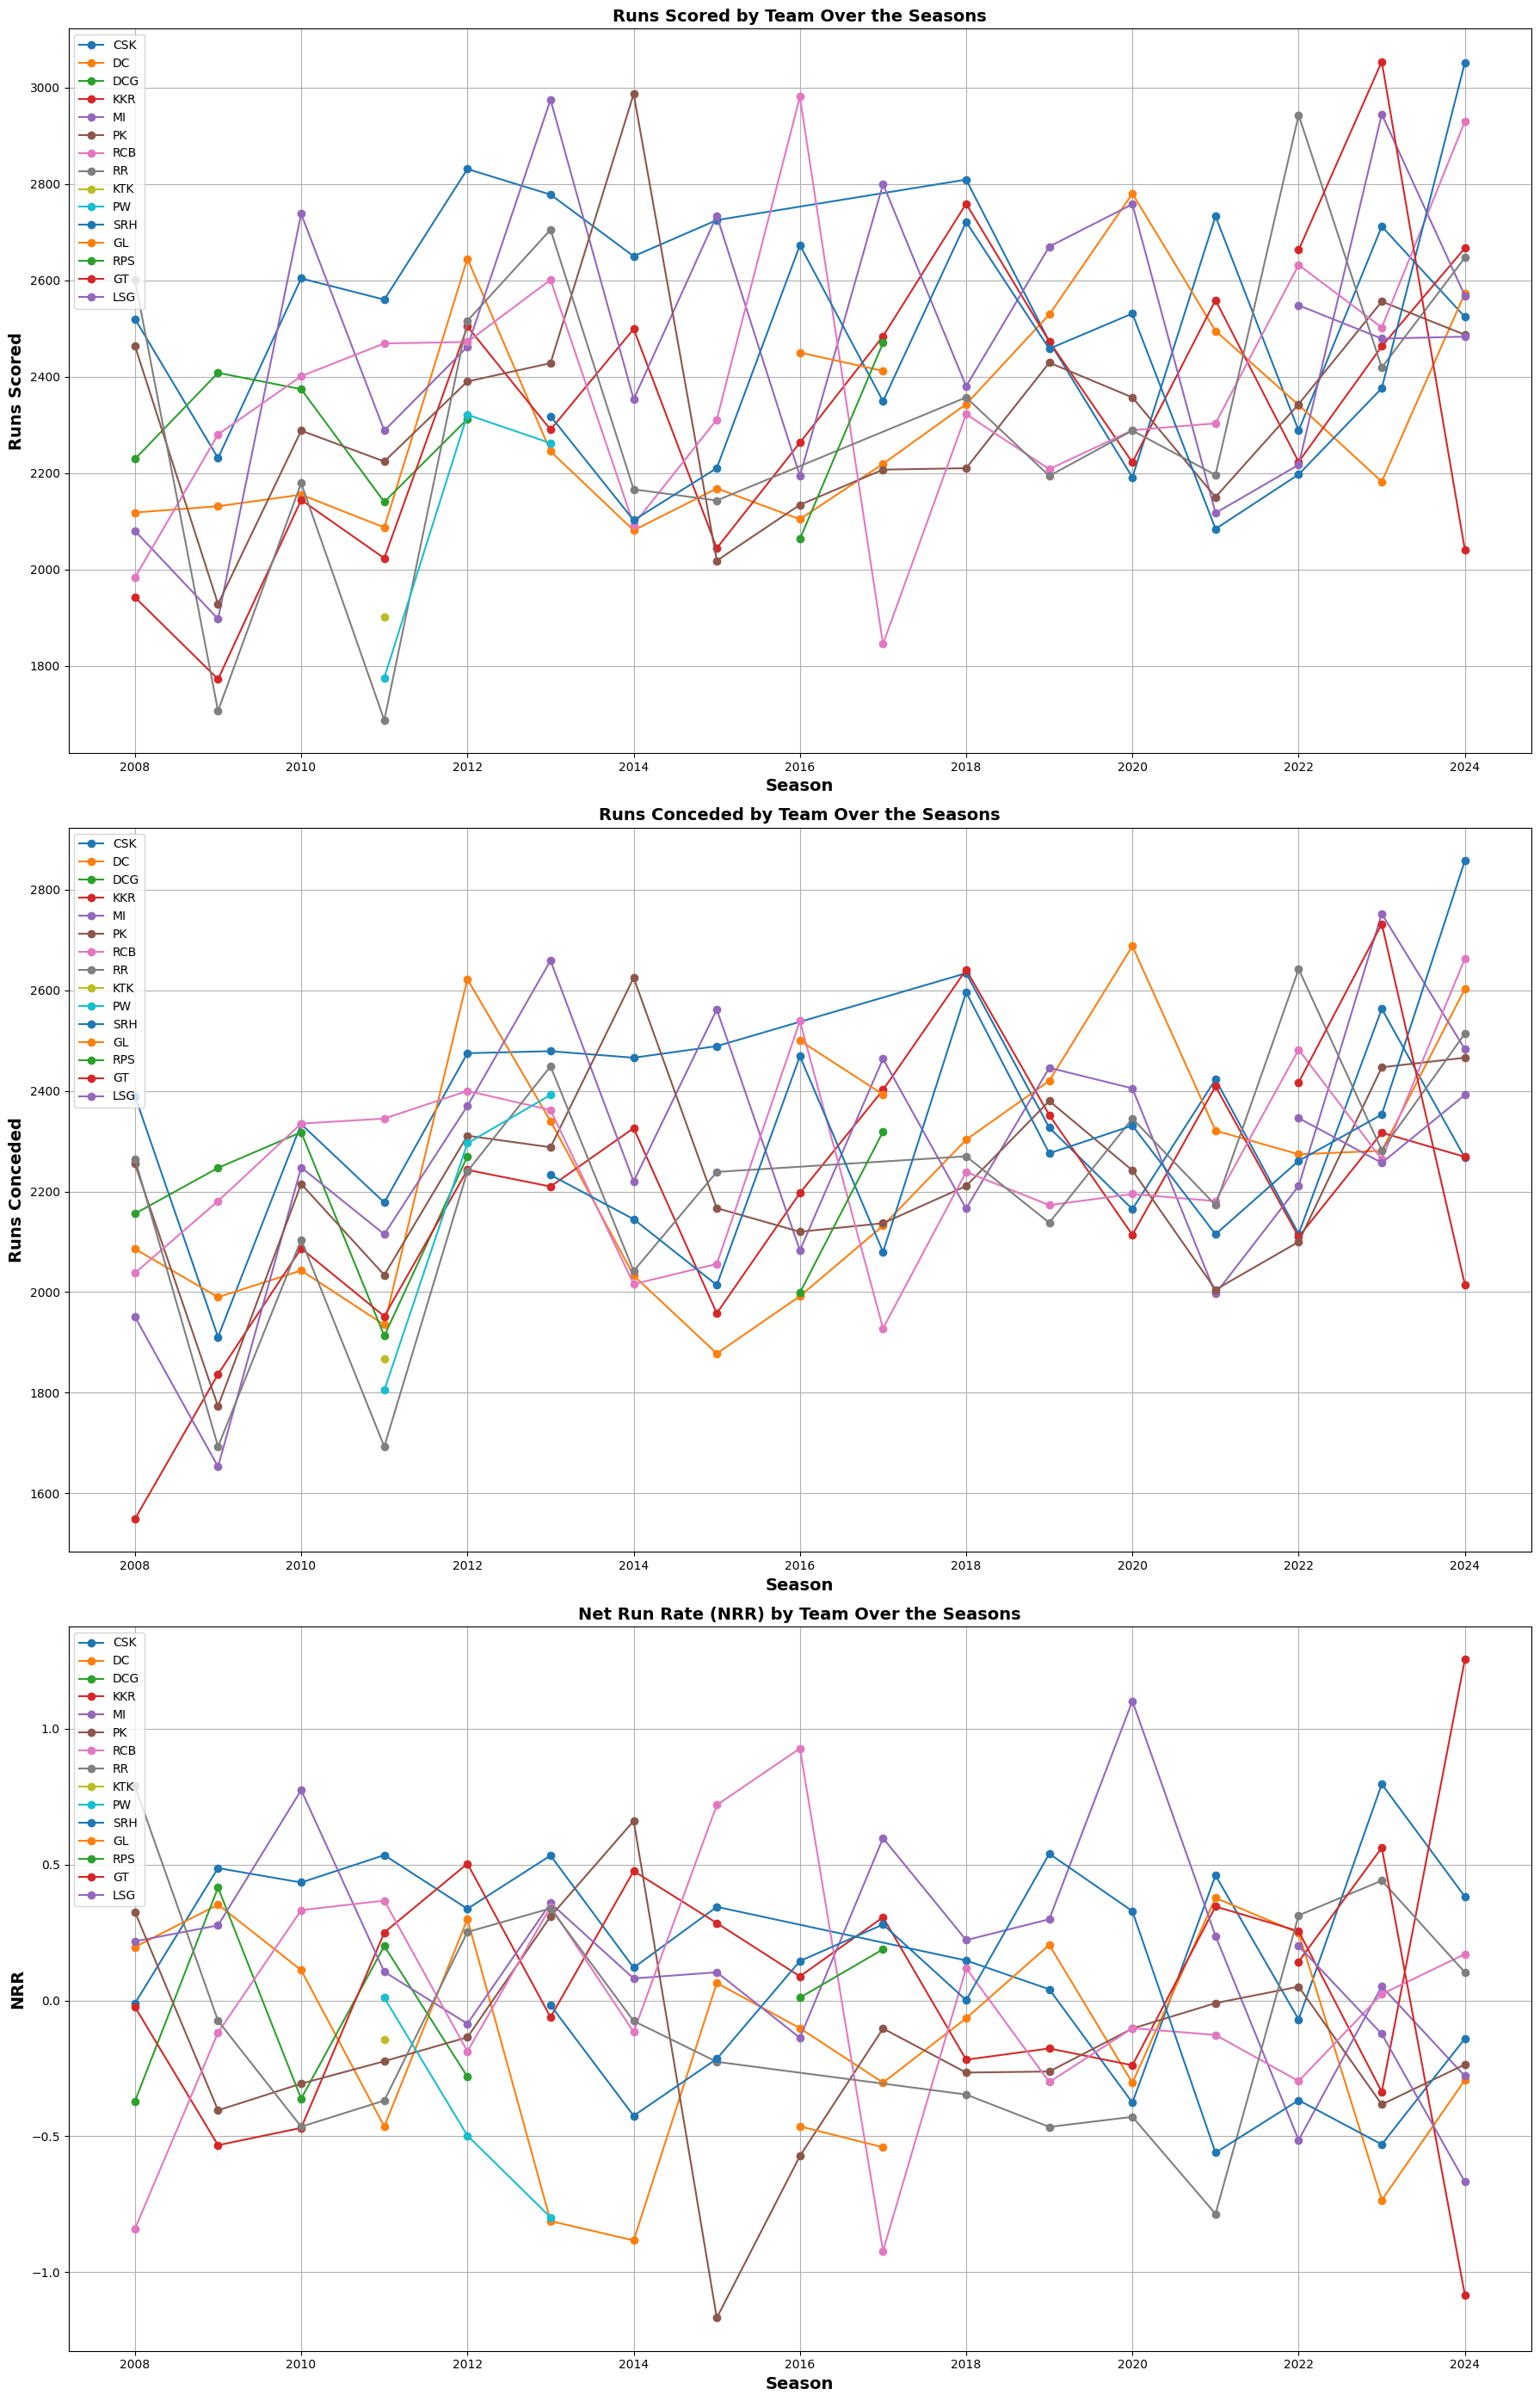

In [50]:
fig, axs = plt.subplots(3, figsize=(18, 28))

# Runs Scored Trend by Team
for team in df_cleaned['Team'].unique():
    team_data = df_cleaned[df_cleaned['Team'] == team]
    axs[0].plot(team_data['Season'], team_data['Runs'], marker='o', label=team)
axs[0].set_title('Runs Scored by Team Over the Seasons',fontsize=14,fontweight="bold")
axs[0].set_xlabel('Season',fontsize=14,fontweight="bold")
axs[0].set_ylabel('Runs Scored',fontsize=14,fontweight="bold")
axs[0].legend()
axs[0].grid(True)

# Runs Conceded Trend by Team
for team in df_cleaned['Team'].unique():
    team_data = df_cleaned[df_cleaned['Team'] == team]
    axs[1].plot(team_data['Season'], team_data['Runs_conceded'], marker='o', label=team)
axs[1].set_title('Runs Conceded by Team Over the Seasons',fontsize=14,fontweight="bold")
axs[1].set_xlabel('Season',fontsize=14,fontweight="bold")
axs[1].set_ylabel('Runs Conceded',fontsize=14,fontweight="bold")
axs[1].legend()
axs[1].grid(True)

# NRR Trend by Team
for team in df_cleaned['Team'].unique():
    team_data = df_cleaned[df_cleaned['Team'] == team]
    axs[2].plot(team_data['Season'], team_data['NRR'], marker='o', label=team)
axs[2].set_title('Net Run Rate (NRR) by Team Over the Seasons',fontsize=14,fontweight="bold")
axs[2].set_xlabel('Season',fontsize=14,fontweight="bold")
axs[2].set_ylabel('NRR',fontsize=14,fontweight="bold")
axs[2].legend()
axs[2].grid(True)

# Adjust layout

plt.tight_layout()
plt.show()